In [148]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [76]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

from config import *

# PATCH STATISTICS

In [189]:
names = [f for f in os.listdir(TRAIN_MASK_PATH) if f.count('_') < 3 and f.endswith('.png')]

### Number of cells

In [6]:
numbers = np.zeros(len(names))

for i, name in enumerate(names):
    # load patch
    patch = cv2.imread(TRAIN_MASK_PATH + name, cv2.IMREAD_GRAYSCALE)
    # count cells
    no_cells, _ = cv2.connectedComponents(patch)
    # append the count to the counts array
    numbers[i] = no_cells - 1

{'whiskers': [<matplotlib.lines.Line2D at 0x12956b150>,
 'caps': [<matplotlib.lines.Line2D at 0x1295c8950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1287fb590>],
 'medians': [<matplotlib.lines.Line2D at 0x128fc4fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1295d78d0>],
 'means': []}

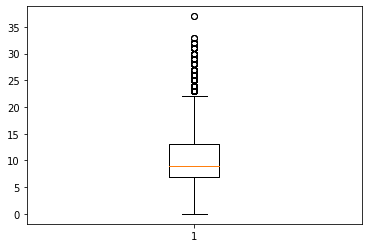

In [7]:
plt.boxplot(numbers)

(array([4.080e+02, 3.556e+03, 3.722e+03, 1.372e+03, 7.420e+02, 6.030e+02,
        4.020e+02, 2.560e+02, 4.600e+01, 2.000e+00]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <a list of 10 Patch objects>)

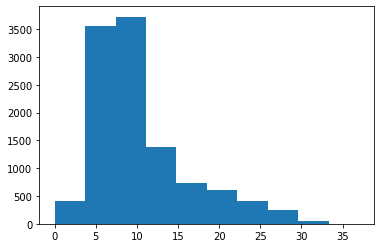

In [8]:
plt.hist(numbers)

<BarContainer object of 35 artists>

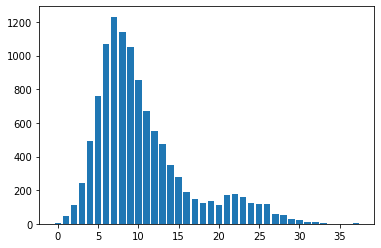

In [9]:
unique, counts = np.unique(numbers, return_counts=True)

plt.bar(unique, counts)

<BarContainer object of 2 artists>

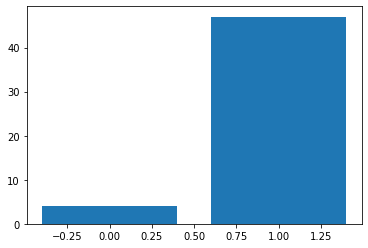

In [11]:
plt.bar(unique[:2], counts[:2])

<BarContainer object of 8 artists>

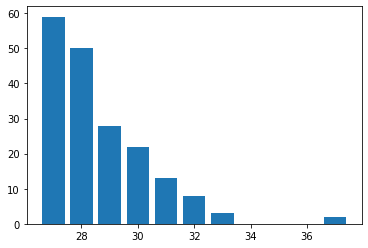

In [13]:
plt.bar(unique[27:], counts[27:])

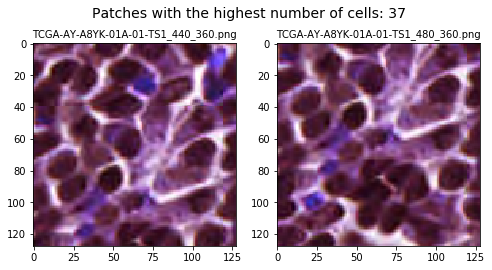

In [49]:
max_indices = np.where(numbers == numbers.max())
num_subplots = len(max_indices[0])
fig = plt.figure(figsize=(num_subplots*4, 4))
fig.suptitle('Patches with the highest number of cells: ' + str(int(numbers.max())), fontsize=14)

for i, idx in enumerate(max_indices[0]):
    patch = cv2.imread(TRAIN_IMG_PATH + names[idx])
    ax = fig.add_subplot(1, num_subplots, i+1)
    ax.set_title(names[idx], fontdict={'fontsize': 10})
    plt.imshow(patch)

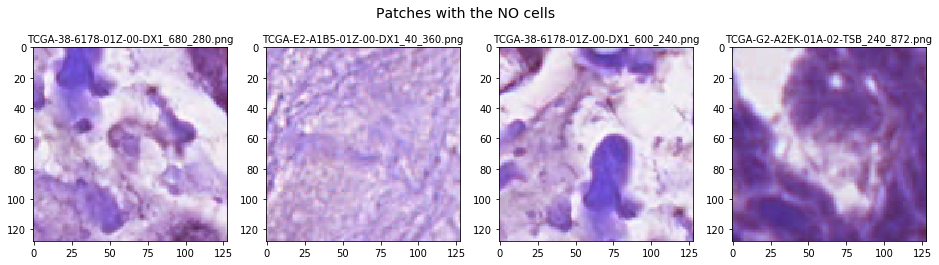

In [52]:
min_indices = np.where(numbers == numbers.min())
num_subplots = len(min_indices[0])
fig = plt.figure(figsize=(num_subplots*4, 4))
fig.suptitle('Patches with the NO cells',  fontsize=14)

for i, idx in enumerate(min_indices[0]):
    patch = cv2.imread(TRAIN_IMG_PATH + names[idx])
    ax = fig.add_subplot(1, num_subplots, i+1)
    ax.set_title(names[idx], fontdict={'fontsize': 10})
    plt.imshow(patch)

### Cell areas

In [192]:
df_patch = pd.DataFrame(columns=['patch', 'component_idx', 'area', 'width', 'height', 'left', 'top'])
for name in names:
    img = cv2.imread(TRAIN_MASK_PATH + name, cv2.IMREAD_GRAYSCALE)
    no_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img)
    _df = pd.DataFrame(stats[1:], columns=['left', 'top', 'width', 'height', 'area'])
    _df.head(5)
    _df['patch'] = name
    _df['component_idx'] = range(1, no_labels)
    df_patch = pd.concat([df_patch, _df], ignore_index=True)
    
df_patch['area'] = pd.to_numeric(df_patch['area'])

df_patch.head(5)

,patch,component_idx,area,width,height,left,top
0,TCGA-50-5931-01Z-00-DX1_760_760.png,1,546,40,26,0,0
1,TCGA-50-5931-01Z-00-DX1_760_760.png,2,102,20,11,79,0
2,TCGA-50-5931-01Z-00-DX1_760_760.png,3,1924,41,62,87,0
3,TCGA-50-5931-01Z-00-DX1_760_760.png,4,1535,58,46,22,6
4,TCGA-50-5931-01Z-00-DX1_760_760.png,5,819,33,36,0,39


In [194]:
from utilities import *
dump(df_patch, 'cells_in_patches', DUMPS_PATH)

Written to: /Users/macbook/Desktop/SKOLA/DP/code/bla/data/cells_in_patches__1587909943


In [199]:
df_patch[['area']].describe()

,area
count,116442.000000
mean,455.518851
std,519.484464
min,1.000000
25%,150.000000
50%,319.000000
75%,574.000000
max,11300.000000


#### LARGEST CELL 

Text(0.5, 0.98, 'Patch with the largest cell TCGA-50-5931-01Z-00-DX1_440_120.png')

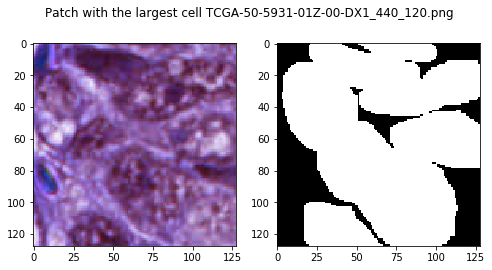

In [219]:
patch_name = df_patch[df_patch['area']==df_patch['area'].max()]['patch'].item()
patch_mask = cv2.imread(TRAIN_MASK_PATH + patch_name)
patch = cv2.imread(TRAIN_IMG_PATH + patch_name)

fig = plt.figure(figsize=(8,4))
fig.add_subplot(1,2,1)
plt.imshow(patch)
fig.add_subplot(1,2,2)
plt.imshow(patch_mask)
fig.suptitle('Patch with the largest cell ' + patch_name)

#### SMALLEST CELLS 

In [202]:
df_patch[df_patch['area']==df_patch['area'].min()]

,patch,component_idx,area,width,height,left,top
492,TCGA-38-6178-01Z-00-DX1_840_840.png,3,1,1,1,127,0
1864,TCGA-KB-A93J-01A-01-TS1_320_600.png,5,1,1,1,127,0
2020,TCGA-RD-A8N9-01A-01-TS1_720_280.png,24,1,1,1,86,127
2359,TCGA-G9-6363-01Z-00-DX1_600_800.png,1,1,1,1,0,0
2371,TCGA-21-5786-01Z-00-DX1_600_760.png,6,1,1,1,127,127
...,...,...,...,...,...,...,...
113128,TCGA-G2-A2EK-01A-02-TSB_800_360.png,1,1,1,1,0,0
113287,TCGA-G2-A2EK-01A-02-TSB_560_40.png,12,1,1,1,33,127
113594,TCGA-G9-6356-01Z-00-DX1_560_720.png,10,1,1,1,76,127
113595,TCGA-G9-6356-01Z-00-DX1_560_720.png,11,1,1,1,127,127


Text(0.5, 0.98, 'Patch with 1px cell TCGA-38-6178-01Z-00-DX1_840_840.png')

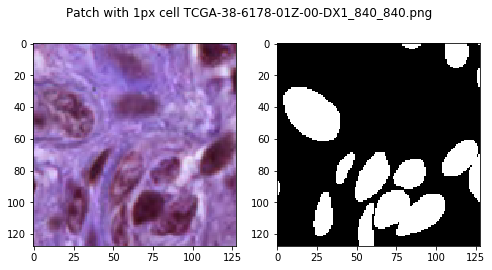

In [223]:
patch_name = df_patch[df_patch['area']==df_patch['area'].min()].iloc[0]['patch']
patch_mask = cv2.imread(TRAIN_MASK_PATH + patch_name)
patch = cv2.imread(TRAIN_IMG_PATH + patch_name)

fig = plt.figure(figsize=(8,4))
fig.add_subplot(1,2,1)
plt.imshow(patch)
fig.add_subplot(1,2,2)
plt.imshow(patch_mask)
fig.suptitle('Patch with 1px cell ' + patch_name)

#### TOTAL CELL AREA IN PATCH

In [206]:
total_areas = df_patch[['patch', 'area']].groupby('patch').sum()
total_areas.describe()

,area
count,11105.000000
mean,4776.364340
std,2072.763737
min,7.000000
25%,3292.000000
50%,4716.000000
75%,6232.000000
max,12312.000000


#### THIRTY PATCHES WITH THE SMALLEST TOTAL CELL AREA

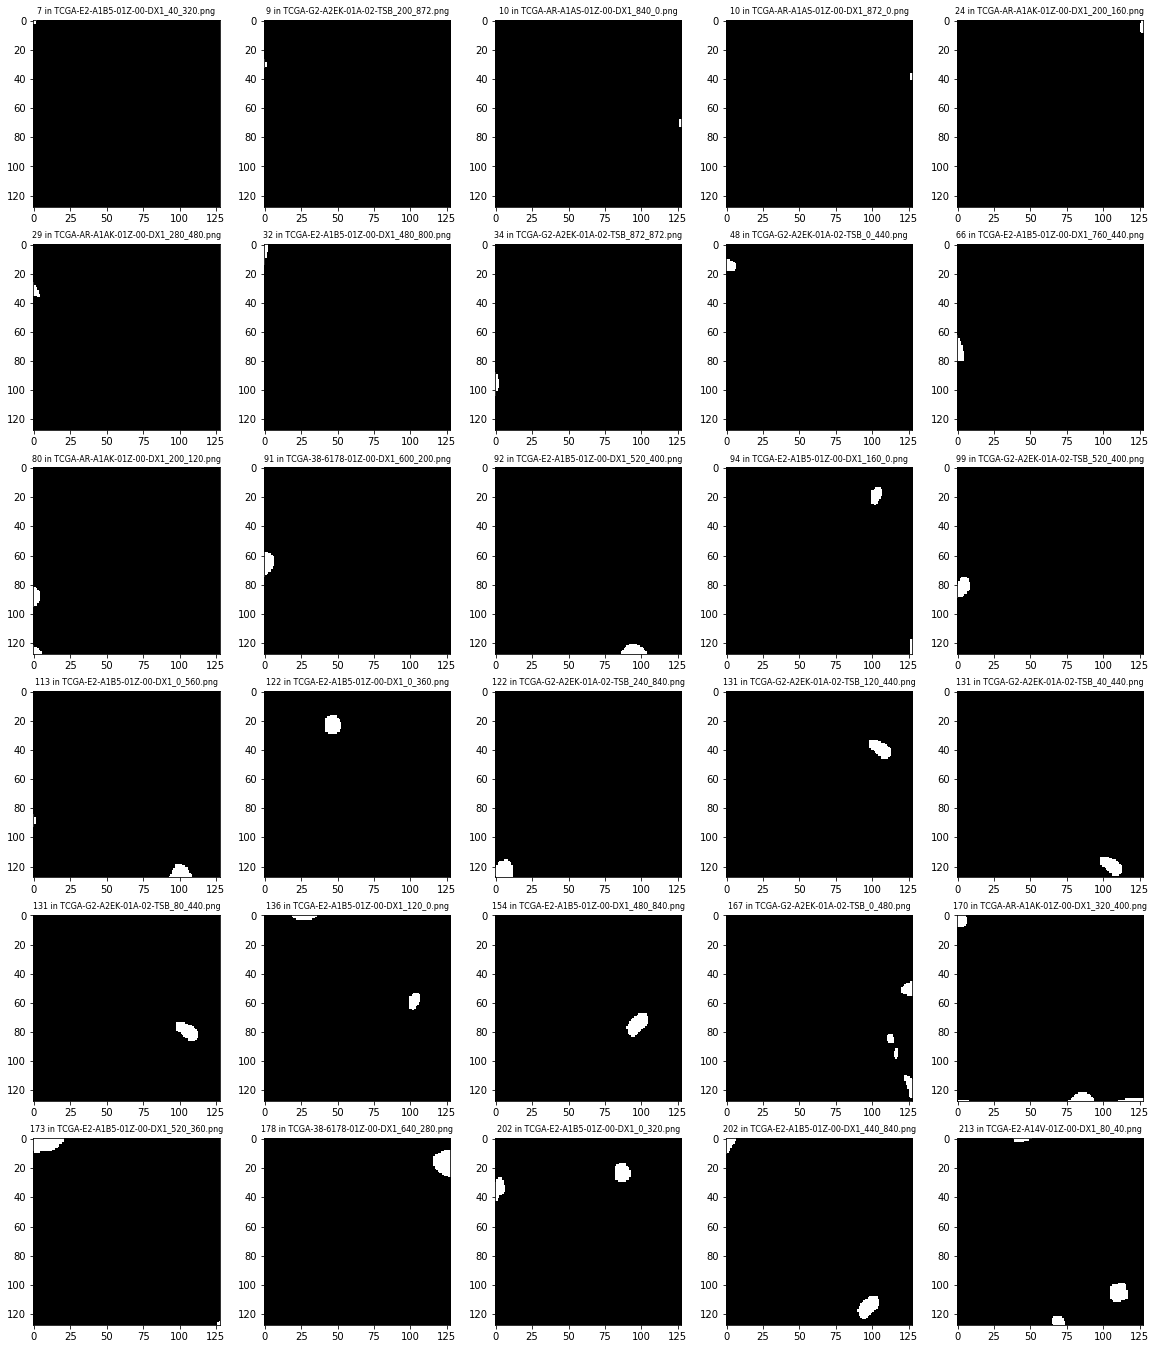

In [215]:
thirty_smallest = total_areas.nsmallest(30, ['area'])
thirty_smallest = thirty_smallest.reset_index()

fig = plt.figure(figsize=(20, 24))
for index, row in thirty_smallest.iterrows():
    ax = fig.add_subplot(6,5,index+1)
    ax.set_title(str(row['area']) + ' in ' + row['patch'], fontdict={'fontsize': 8})
    plt.imshow(cv2.imread(TRAIN_MASK_PATH + row['patch']))

# IMAGE STATISTICS

### Cell areas

In [237]:
names = [f for f in os.listdir(ORIGINAL_TRAIN_MASK_PATH) if f.endswith('.png')]
len(names)

21

In [112]:
areas = [None] * len(names)

for i, name in enumerate(names):
    # load image
    img = cv2.imread(ORIGINAL_TRAIN_MASK_PATH + name, cv2.IMREAD_GRAYSCALE)
    # get contours
    contours,hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE )

    _areas = []

    for ci, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if area==0:
            print(name + " contour idx: " + str(ci))
        _areas.append(area)

    areas[i] = _areas

TCGA-50-5931-01Z-00-DX1.png contour idx: 182
TCGA-AR-A1AK-01Z-00-DX1.png contour idx: 0


Contour area: 0.0


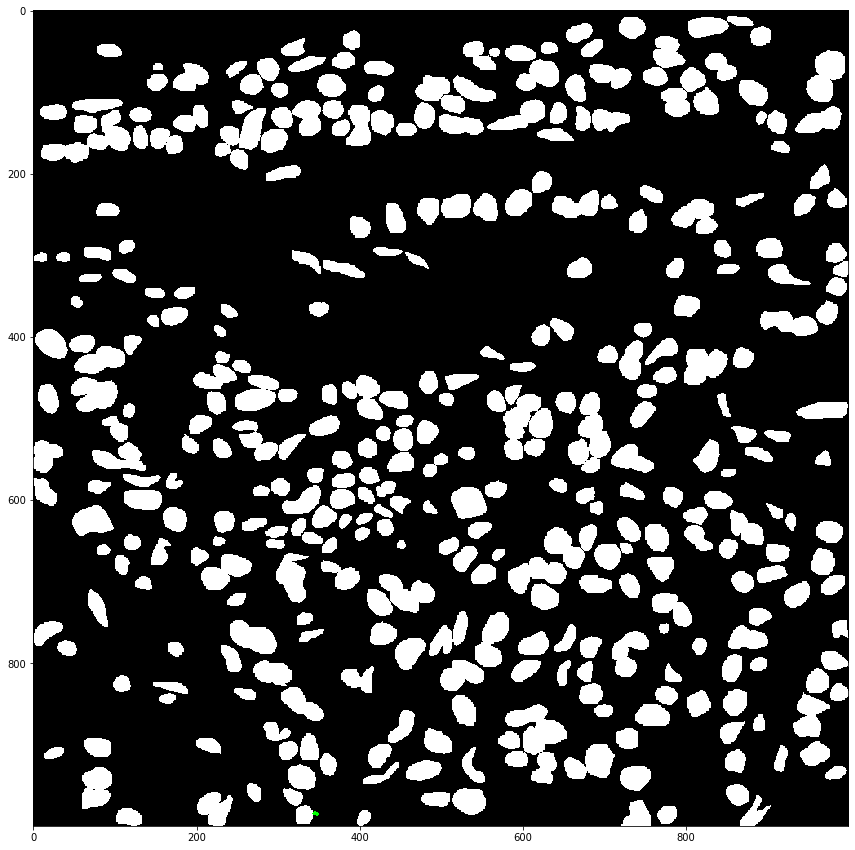

In [146]:
rgb = cv2.imread(ORIGINAL_TRAIN_MASK_PATH + 'TCGA-AR-A1AK-01Z-00-DX1.png')
bw = cv2.imread(ORIGINAL_TRAIN_MASK_PATH + 'TCGA-AR-A1AK-01Z-00-DX1.png', cv2.IMREAD_GRAYSCALE)
contours,hierarchy = cv2.findContours(bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE )

fig = plt.figure(figsize=(15,15))
plt.imshow(cv2.drawContours(rgb, contours, 0, (0,255,0), 3))
print("Contour area: " + str(cv2.contourArea(contours[0])))

Text(0, 0.5, 'Cell areas')

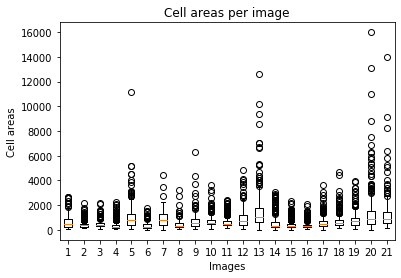

In [81]:
plt.boxplot(areas)
plt.title('Cell areas per image')
plt.xlabel('Images')
plt.ylabel('Cell areas')

Text(0, 0.5, 'Cell areas')

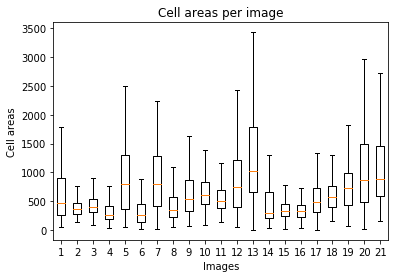

In [83]:
plt.boxplot(areas, showfliers=False)
plt.title('Cell areas per image')
plt.xlabel('Images')
plt.ylabel('Cell areas')

{'whiskers': [<matplotlib.lines.Line2D at 0x12e26ab90>,
 'caps': [<matplotlib.lines.Line2D at 0x12e26aa50>,
 'boxes': [<matplotlib.lines.Line2D at 0x12e26ab50>],
 'medians': [<matplotlib.lines.Line2D at 0x12e3efc90>],
 'fliers': [],
 'means': []}

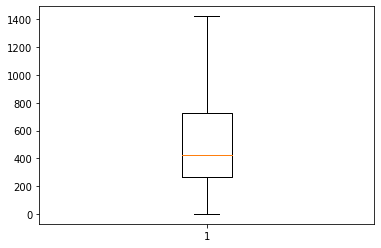

In [110]:
plt.boxplot(flat, showfliers=False)

In [121]:
flat = np.array(flatten_list(areas))

print('Cell areas')
print('maximum: ' + str(max(flat)))
print('minimum: ' + str(min(flat)))
print('median: ' + str(np.median(flat)))
print('mean: ' + str(np.mean(flat)))
print('std: ' + str(np.std(flat)))
print('median - 1/2 std: ' + str(np.median(flat) - np.std(flat)/2))

Cell areas
maximum: 15986.5
minimum: 0.0
median: 422.5
mean: 622.2098786056354
std: 723.4006768234453
median - 1/2 std: 60.79966158827733


In [234]:
small_areas = [[sm_a for sm_a in area if sm_a < 61] for area in areas]

In [235]:
counts = [len(sm_a) for sm_a in small_areas]
counts

[2, 0, 0, 10, 3, 15, 2, 1, 0, 0, 0, 1, 1, 3, 9, 7, 1, 0, 0, 5, 0]

In [239]:
sum(counts)

60

<BarContainer object of 1993 artists>

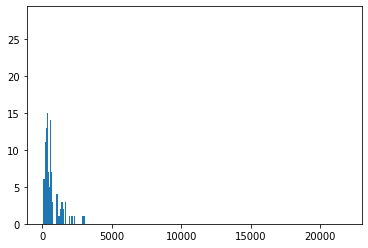

In [53]:
unique, counts = np.unique(flat, return_counts=True)

plt.bar(unique, counts)

### Cell areas (using connected components)

In [238]:
df = pd.DataFrame(columns=['img', 'component_idx', 'area', 'width', 'height', 'left', 'top'])
for name in names:
    img = cv2.imread(ORIGINAL_TRAIN_MASK_PATH + name, cv2.IMREAD_GRAYSCALE)
    no_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img)
    _df = pd.DataFrame(stats[1:], columns=['left', 'top', 'width', 'height', 'area'])
    _df['img'] = name
    _df['component_idx'] = range(1, no_labels)
    df = pd.concat([df, _df], ignore_index=True)

df.head(5)

,img,component_idx,area,width,height,left,top
0,TCGA-38-6178-01Z-00-DX1.png,1,166,13,15,1,1
1,TCGA-38-6178-01Z-00-DX1.png,2,1007,36,34,26,1
2,TCGA-38-6178-01Z-00-DX1.png,3,647,54,17,86,1
3,TCGA-38-6178-01Z-00-DX1.png,4,569,38,22,416,1
4,TCGA-38-6178-01Z-00-DX1.png,5,1321,42,44,529,1


In [241]:
df['area'] = pd.to_numeric(df['area'])
df[['area']].describe()

,area
count,8979.000000
mean,668.061365
std,750.133946
min,2.000000
25%,296.000000
50%,461.000000
75%,781.000000
max,16580.000000


In [242]:
thirty_smallest = df.nsmallest(30, ['area'])
thirty_smallest.reset_index()

,index,img,component_idx,area,width,height,left,top
0,5128,TCGA-50-5931-01Z-00-DX1.png,74,2,2,1,98,319
1,7821,TCGA-AR-A1AK-01Z-00-DX1.png,341,5,5,2,344,984
2,2647,TCGA-G2-A2EK-01A-02-TSB.png,38,17,3,7,595,92
3,2641,TCGA-G2-A2EK-01A-02-TSB.png,32,26,5,6,590,82
4,3053,TCGA-DK-A2I6-01A-01-TS1.png,79,28,7,4,483,251
5,2913,TCGA-G2-A2EK-01A-02-TSB.png,304,31,6,7,62,820
6,8469,TCGA-18-5592-01Z-00-DX1.png,22,33,6,8,424,44
7,6004,TCGA-KB-A93J-01A-01-TS1.png,367,34,5,11,319,370
8,2867,TCGA-G2-A2EK-01A-02-TSB.png,258,35,6,7,321,692
9,2957,TCGA-G2-A2EK-01A-02-TSB.png,348,37,5,9,808,937


In [243]:
thirty_smallest[['area']].sum()

area    1286
dtype: int64

In [244]:
df[['area']].sum()

area    5998523
dtype: int64